In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# читаем датафреймы
df = pd.read_csv('train.csv')
lectures = pd.read_csv('lectures.csv')
questions = pd.read_csv('questions.csv')

In [3]:
# выводим размер датафрейма
df.shape

(101230332, 10)

In [4]:
# выводим размер датафрейма
lectures.shape

(418, 4)

In [5]:
# выводим размер датафрейма
questions.shape

(13523, 5)

In [6]:
#смотрим на присутствующие столбцы
df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,0,22,0,1,18000.0,True
101230328,101230328,428585000,2147482888,6341,0,23,3,1,14000.0,True
101230329,101230329,428613475,2147482888,4212,0,24,3,1,14000.0,True
101230330,101230330,428649406,2147482888,6343,0,25,1,0,22000.0,True


In [7]:
# описываем статистические метрики
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [8]:
#смотрим значения null
df.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

In [9]:
#видим пропущенные значения в prior_question_elapsed_time и prior_question_had_explanation     

In [10]:
# было ли объяснение на предыдущий вопрос
df.prior_question_had_explanation.value_counts()

prior_question_had_explanation
True     89685560
False    11152266
Name: count, dtype: int64

**Можно выделить несколько видов информации в датасете:**
1. Пользовательские данные — Информация о пользователе, например, user_id
2. Данные о вопросах — Информация о вопросах, например, ID вопроса, категория и т.д.
3. Данные о взаимодействии между пользователями и вопросами — Информация о взаимодействиях между пользователями и вопросами, например, время ответа.
4. answered_correctly — Целевая переменная, которая показывает, был ли ответ пользователя правильным или нет.

1. row_id - является id строки
2. timestamp - время в миллисекундах между взаимодействием с пользователем и первым завершением события от этого пользователя.

In [11]:
# выводим количество уникальных значений для заданных столбцов
columns_to_analyze = ['user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer']

# рассчитываем количество уникальных значений
unique_counts = df[columns_to_analyze].nunique()

# выводим результаты
print("Распределение уникальных значений по столбцам:")
print(unique_counts)

Распределение уникальных значений по столбцам:
user_id              393656
content_id            13782
content_type_id           2
task_container_id     10000
user_answer               5
dtype: int64


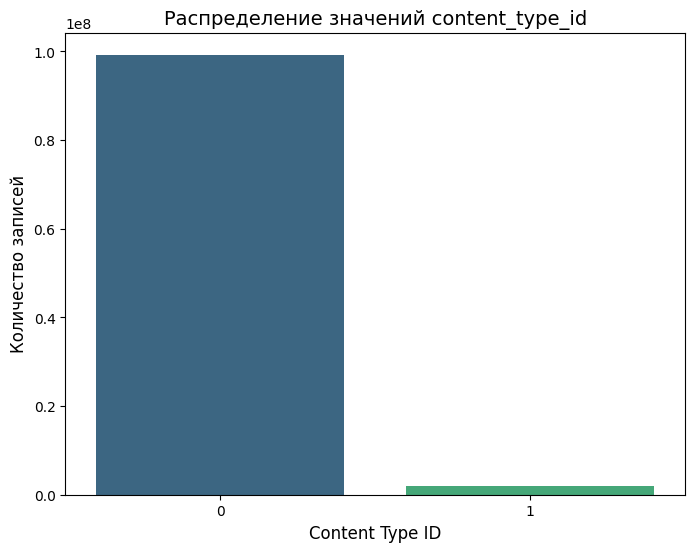

In [12]:
# построение распеределения значений content_type_id
plt.figure(figsize=(8, 6))
sns.countplot(x='content_type_id', data=df, palette='viridis')

# добавляем заголовки и подписи
plt.title('Распределение значений content_type_id', fontsize=14)
plt.xlabel('Content Type ID', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)

# выводим график
plt.show()

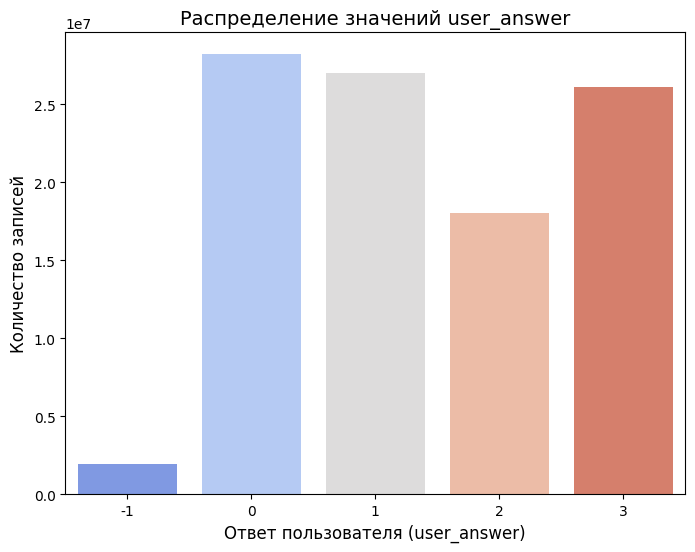

In [13]:
# построение распеределения значений user_answer
plt.figure(figsize=(8, 6))
sns.countplot(x='user_answer', data=df, palette='coolwarm')

# добавляем заголовки и подписи
plt.title('Распределение значений user_answer', fontsize=14)
plt.xlabel('Ответ пользователя (user_answer)', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)

# выводим график
plt.show()

Целевая переменная в задаче "answered_correctly" — это правильность ответа. это бинарная переменная (0 или 1), которая говорит, был ли ответ правильным или неправильным.

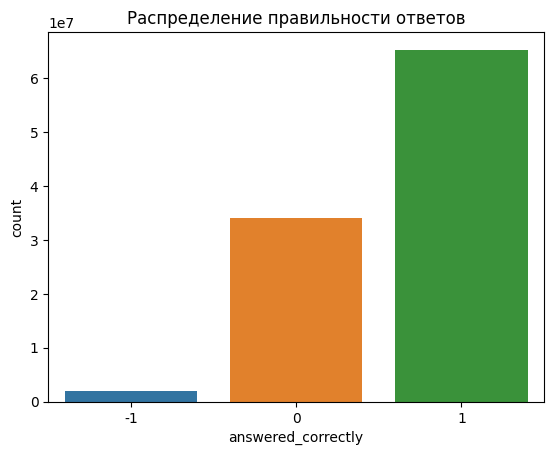

In [14]:
# построение распеределения целевой переменной
sns.countplot(x='answered_correctly', data=df)
plt.title('Распределение правильности ответов')
plt.show()

In [15]:
# общее количество ответов
df.answered_correctly.value_counts()

answered_correctly
 1    65244627
 0    34026673
-1     1959032
Name: count, dtype: int64

In [16]:
# доля ответов
df.answered_correctly.value_counts(normalize=True)

answered_correctly
 1    0.644517
 0    0.336131
-1    0.019352
Name: proportion, dtype: float64

как видно из результатов:
    1. в 64% процентах случаев ответ верен
    2. в 34% процентах ответ неправильный
    3. в 2% случаев ответа нет

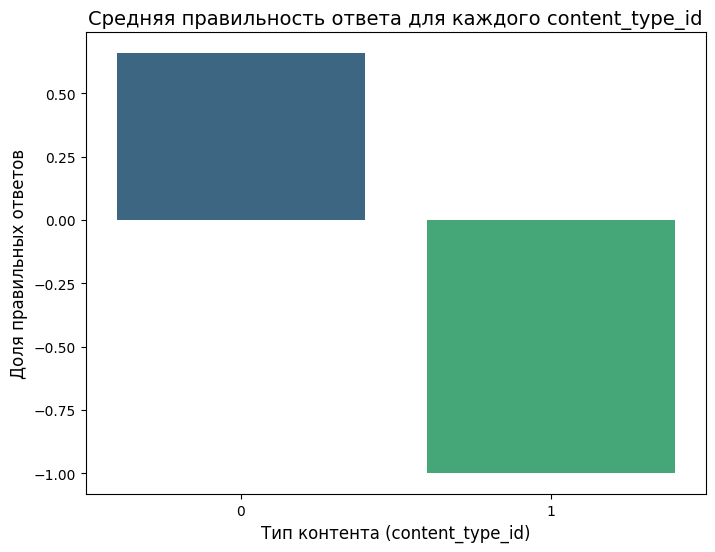

In [17]:
# агрегация данных, среднее значение правильности для каждого content_type_id
aggregated_data = df.groupby('content_type_id', as_index=False)['answered_correctly'].mean()

# построение графика
plt.figure(figsize=(8, 6))
sns.barplot(x='content_type_id', y='answered_correctly', data=aggregated_data, palette='viridis')

# добавление заголовков и подписей
plt.title('Средняя правильность ответа для каждого content_type_id', fontsize=14)
plt.xlabel('Тип контента (content_type_id)', fontsize=12)
plt.ylabel('Доля правильных ответов', fontsize=12)

# выводим график
plt.show()

гистрограмма имеет такую природу из-за того что content_type_id==1 - лекция

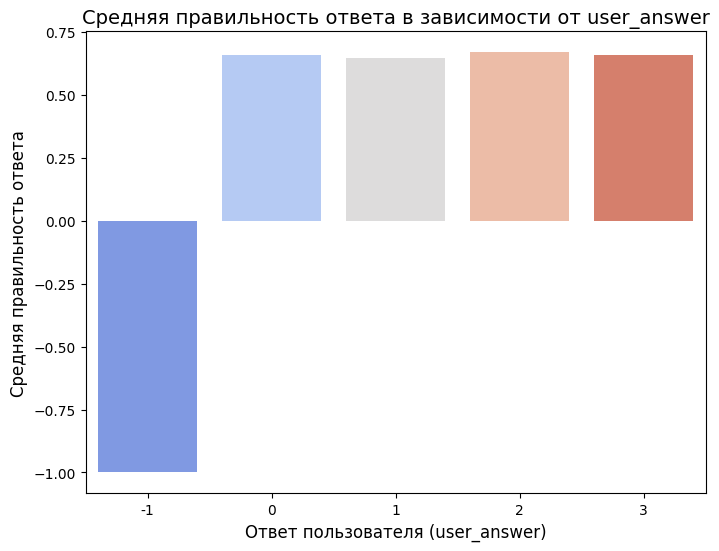

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# агрегация данных, вычисление значения средней правильности для каждого user_answer
aggregated_data = df.groupby('user_answer', as_index=False)['answered_correctly'].mean()

# построение графика
plt.figure(figsize=(8, 6))
sns.barplot(x='user_answer', y='answered_correctly', data=aggregated_data, palette='coolwarm')

# добавление заголовков и подписей
plt.title('Средняя правильность ответа в зависимости от user_answer', fontsize=14)
plt.xlabel('Ответ пользователя (user_answer)', fontsize=12)
plt.ylabel('Средняя правильность ответа', fontsize=12)

# выводим график
plt.show()

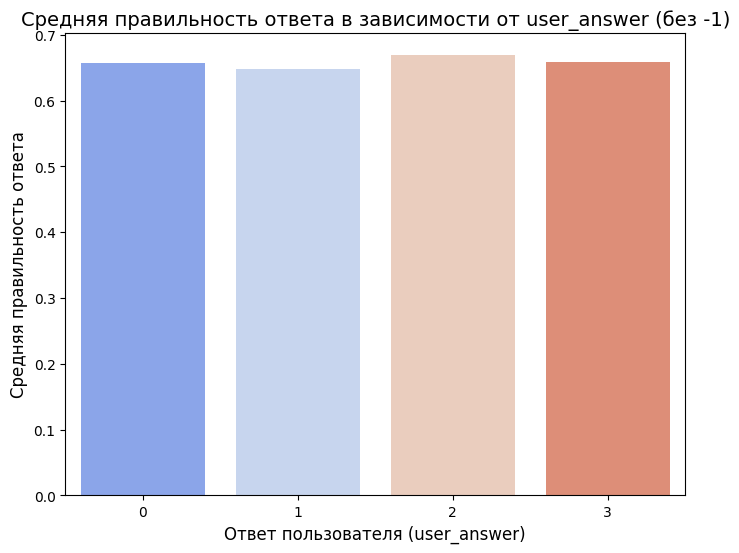

In [19]:
# исключаем строки, где user_answer == -1
filtered_data = df[df['user_answer'] != -1]

# агрегация данных, вычисление значения средней правильности для каждого user_answer
aggregated_data = filtered_data.groupby('user_answer', as_index=False)['answered_correctly'].mean()

# построение графика
plt.figure(figsize=(8, 6))
sns.barplot(x='user_answer', y='answered_correctly', data=aggregated_data, palette='coolwarm')

# добавление заголовков и подписей
plt.title('Средняя правильность ответа в зависимости от user_answer (без -1)', fontsize=14)
plt.xlabel('Ответ пользователя (user_answer)', fontsize=12)
plt.ylabel('Средняя правильность ответа', fontsize=12)

# вывод графика
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler


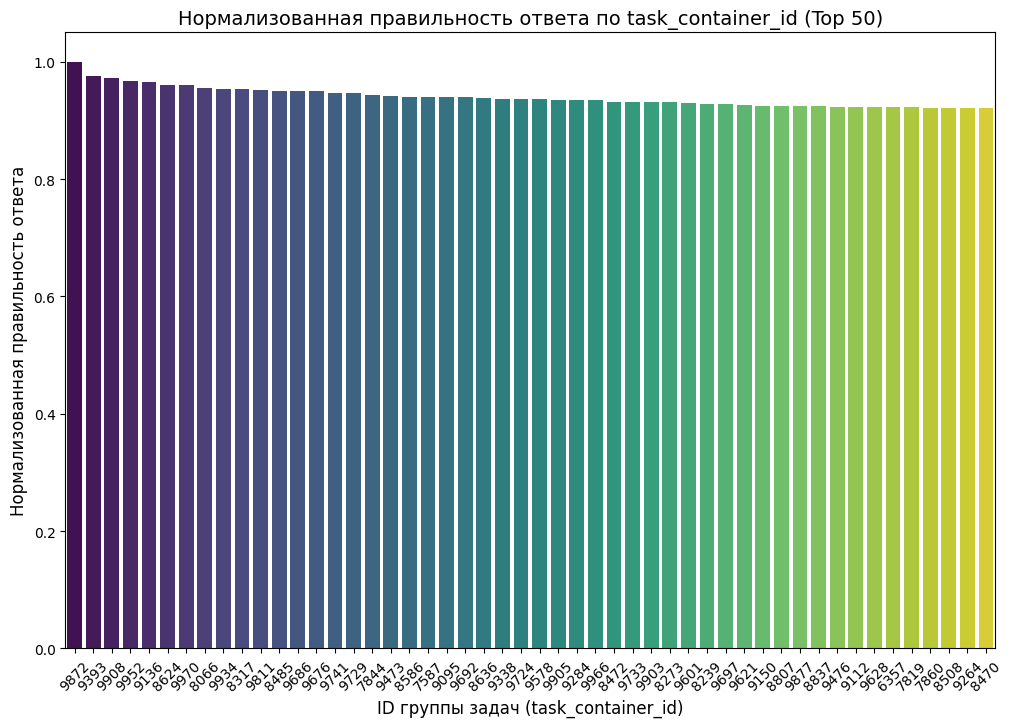

In [21]:
# агрегация данных
aggregated_data = df.groupby('task_container_id', as_index=False)['answered_correctly'].mean()

# нормализация значений средней правильности
scaler = MinMaxScaler()
aggregated_data['normalized_correctness'] = scaler.fit_transform(aggregated_data[['answered_correctly']])

# сортировка по убыванию нормализованной средней правильности
sorted_data = aggregated_data.sort_values('normalized_correctness', ascending=False)

# выбор топ-50 значений
top_50 = sorted_data.head(50)

# построение графика
plt.figure(figsize=(12, 8))
sns.barplot(
    x='task_container_id', 
    y='normalized_correctness', 
    data=top_50, 
    order=top_50['task_container_id'],  # Передача сортированного порядка
    palette='viridis'
)

# добавление заголовков и подписей
plt.title('Нормализованная правильность ответа по task_container_id (Top 50)', fontsize=14)
plt.xlabel('ID группы задач (task_container_id)', fontsize=12)
plt.ylabel('Нормализованная правильность ответа', fontsize=12)
plt.xticks(rotation=45)

# вывод графика
plt.show()

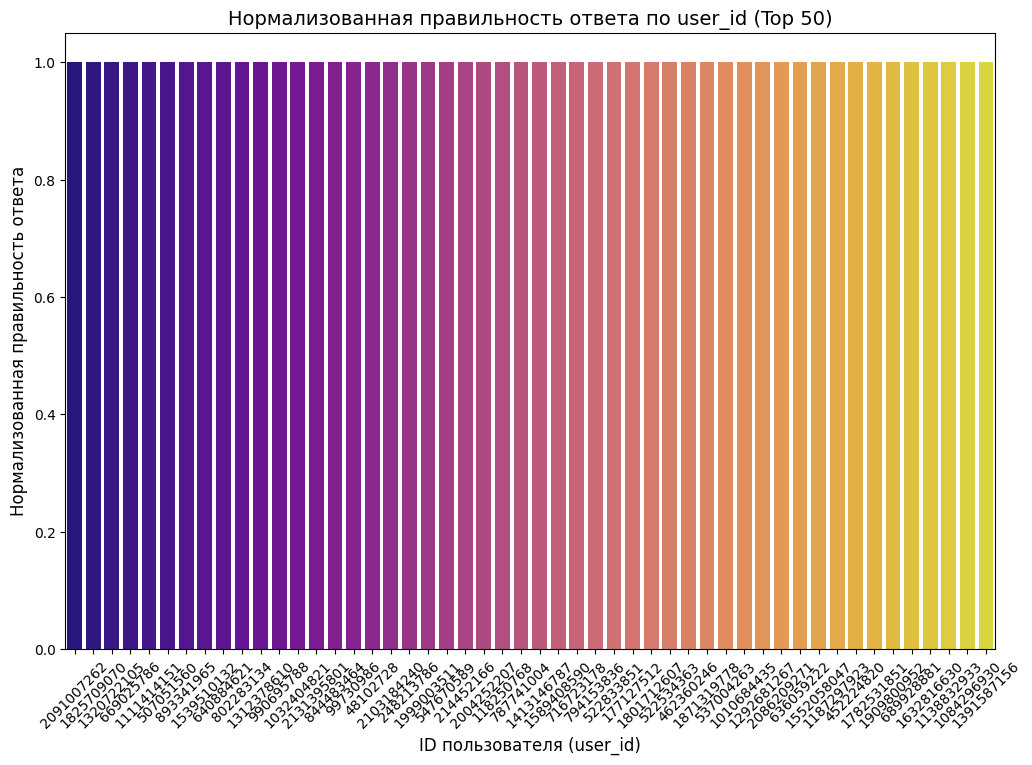

In [22]:
# агрегация данных
aggregated_data = df.groupby('user_id', as_index=False)['answered_correctly'].mean()

# нормализация значений средней правильности
scaler = MinMaxScaler()
aggregated_data['normalized_correctness'] = scaler.fit_transform(aggregated_data[['answered_correctly']])

# сортировка по убыванию нормализованной средней правильности
sorted_data = aggregated_data.sort_values('normalized_correctness', ascending=False)

# выбор топ-50 пользователей
top_50 = sorted_data.head(50)

# построение графика
plt.figure(figsize=(12, 8))
sns.barplot(
    x='user_id', 
    y='normalized_correctness', 
    data=top_50, 
    order=top_50['user_id'],  # Указание порядка
    palette='plasma'
)

# добавление заголовков и подписей
plt.title('Нормализованная правильность ответа по user_id (Top 50)', fontsize=14)
plt.xlabel('ID пользователя (user_id)', fontsize=12)
plt.ylabel('Нормализованная правильность ответа', fontsize=12)
plt.xticks(rotation=45)

# вывод графика
plt.show()

In [23]:
# группировка данных по user_id и проверка, правильно ли пользователь ответил на все вопросы
user_correctness = df.groupby('user_id')['answered_correctly'].apply(lambda x: (x == 1).all())

# подсчет количества пользователей, правильно ответивших на все вопросы
all_correct_users = user_correctness.sum()

# общее количество пользователей
total_users = user_correctness.shape[0]

# доля пользователей
all_correct_users_ratio = all_correct_users / total_users

# вывод доли
print(f"Доля пользователей, правильно ответивших на все вопросы: {all_correct_users_ratio:.4f}")

Доля пользователей, правильно ответивших на все вопросы: 0.0005


In [24]:
# группировка данных по content_id и проверка, были ли все ответы правильными
content_correctness = df.groupby('content_id')['answered_correctly'].apply(lambda x: (x == 1).all())

# подсчет количества контентов, на которых все ответы были правильными
all_correct_content = content_correctness.sum()

# общее количество уникальных content_id
total_content = content_correctness.shape[0]

# доля контентов с правильными ответами
all_correct_content_ratio = all_correct_content / total_content

# вывод доли
print(f"Доля контентов, на которых все ответы были правильными: {all_correct_content_ratio:.4f}")

Доля контентов, на которых все ответы были правильными: 0.0012


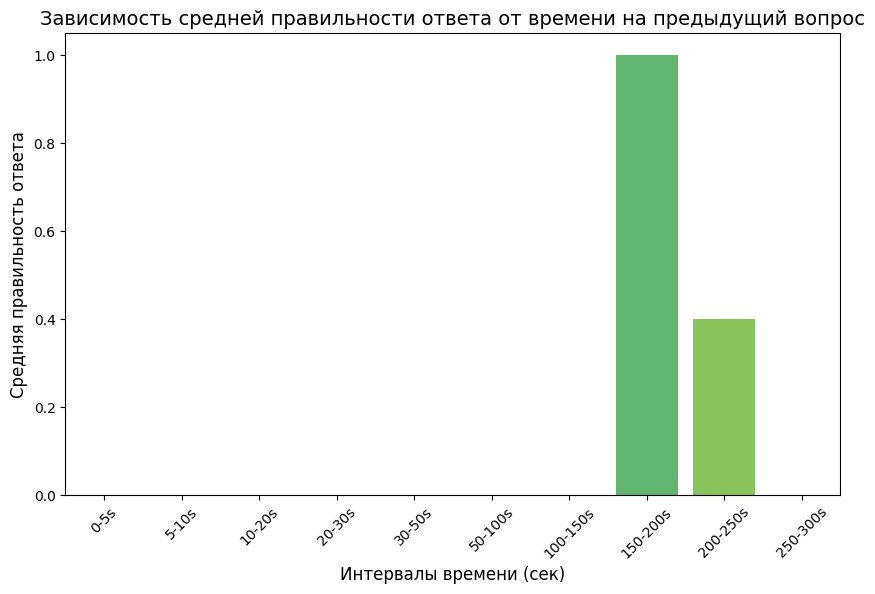

Корреляция между временем на предыдущий вопрос и правильностью ответа: -0.0077


In [25]:
# оптимизация, случайная выборка данных (например, 1% от общего объема)
sample_df = df.sample(frac=0.01, random_state=42)  # Случайная выборка 1% данных

# преобразование данных в интервалы времени в миллисекундах
bins_ms = [0, 5000, 10000, 20000, 30000, 50000, 100000, 150000, 200000, 250000, 300000]
bins_s = [x / 1000 for x in bins_ms]  # Переводим миллисекунды в секунды
labels = ['0-5s', '5-10s', '10-20s', '20-30s', '30-50s', '50-100s', '100-150s', '150-200s', '200-250s', '250-300s']

# добавляем столбец с интервалами времени
sample_df['time_interval'] = pd.cut(sample_df['prior_question_elapsed_time'], bins=bins_s, labels=labels)

# преобразуем правильность ответа (True/False) в 1/0
sample_df['answered_correctly'] = sample_df['answered_correctly'].astype(int)

# средняя правильность для каждого интервала
mean_correctness_by_time = sample_df.groupby('time_interval')['answered_correctly'].mean()

# построение графика для средних значений правильности по интервалам времени
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_correctness_by_time.index, y=mean_correctness_by_time.values, palette='viridis')

# добавление заголовков и подписей
plt.title('Зависимость средней правильности ответа от времени на предыдущий вопрос', fontsize=14)
plt.xlabel('Интервалы времени (сек)', fontsize=12)
plt.ylabel('Средняя правильность ответа', fontsize=12)
plt.xticks(rotation=45)

# вывод графика
plt.show()

# рассчитываем корреляцию между prior_question_elapsed_time и answered_correctly для выборки
correlation = sample_df['prior_question_elapsed_time'].corr(sample_df['answered_correctly'])

# выводим результат
print(f"Корреляция между временем на предыдущий вопрос и правильностью ответа: {correlation:.4f}")

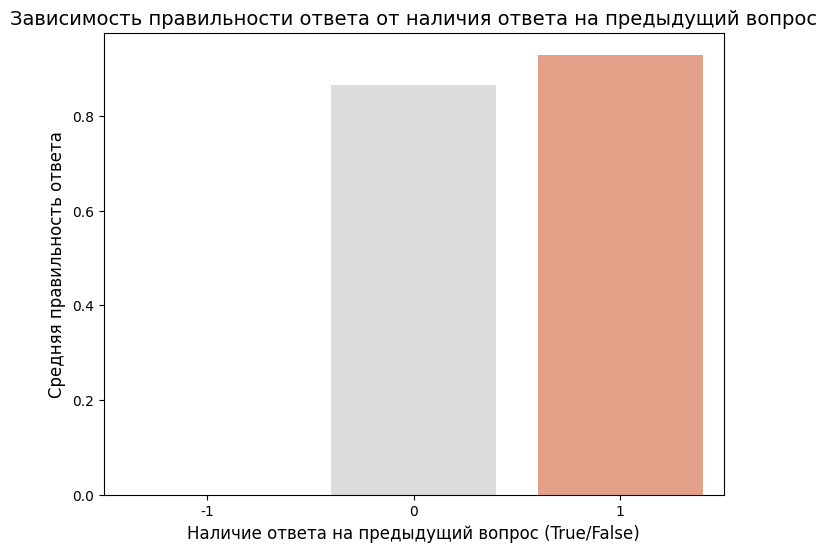

In [26]:
# преобразуем правильность ответа (True/False) в 1/0
df['answered_correctly'] = df['answered_correctly'].astype(int)

# агрегируем данные, чтобы получить среднюю правильность для комбинаций (answered_previous, answered_correctly)
correctness_by_previous_answer = df.groupby('answered_correctly')['prior_question_had_explanation'].mean()

# строим график для зависимости правильности от наличия ответа на предыдущий вопрос
plt.figure(figsize=(8, 6))
sns.barplot(x=correctness_by_previous_answer.index, y=correctness_by_previous_answer.values, palette='coolwarm')

# добавляем заголовков и подписей
plt.title('Зависимость правильности ответа от наличия ответа на предыдущий вопрос', fontsize=14)
plt.xlabel('Наличие ответа на предыдущий вопрос (True/False)', fontsize=12)
plt.ylabel('Средняя правильность ответа', fontsize=12)

# вывод графика
plt.show()

таким образом все признаки проанализированы